In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv('german_credit_data.csv')

In [21]:
#Data Exploration
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [22]:
df.tail(2)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [24]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [25]:
df.corr()['Credit amount'].sort_values(ascending=False)

Credit amount    1.000000
Duration         0.624984
Job              0.285385
Age              0.032716
Unnamed: 0       0.013488
Name: Credit amount, dtype: float64

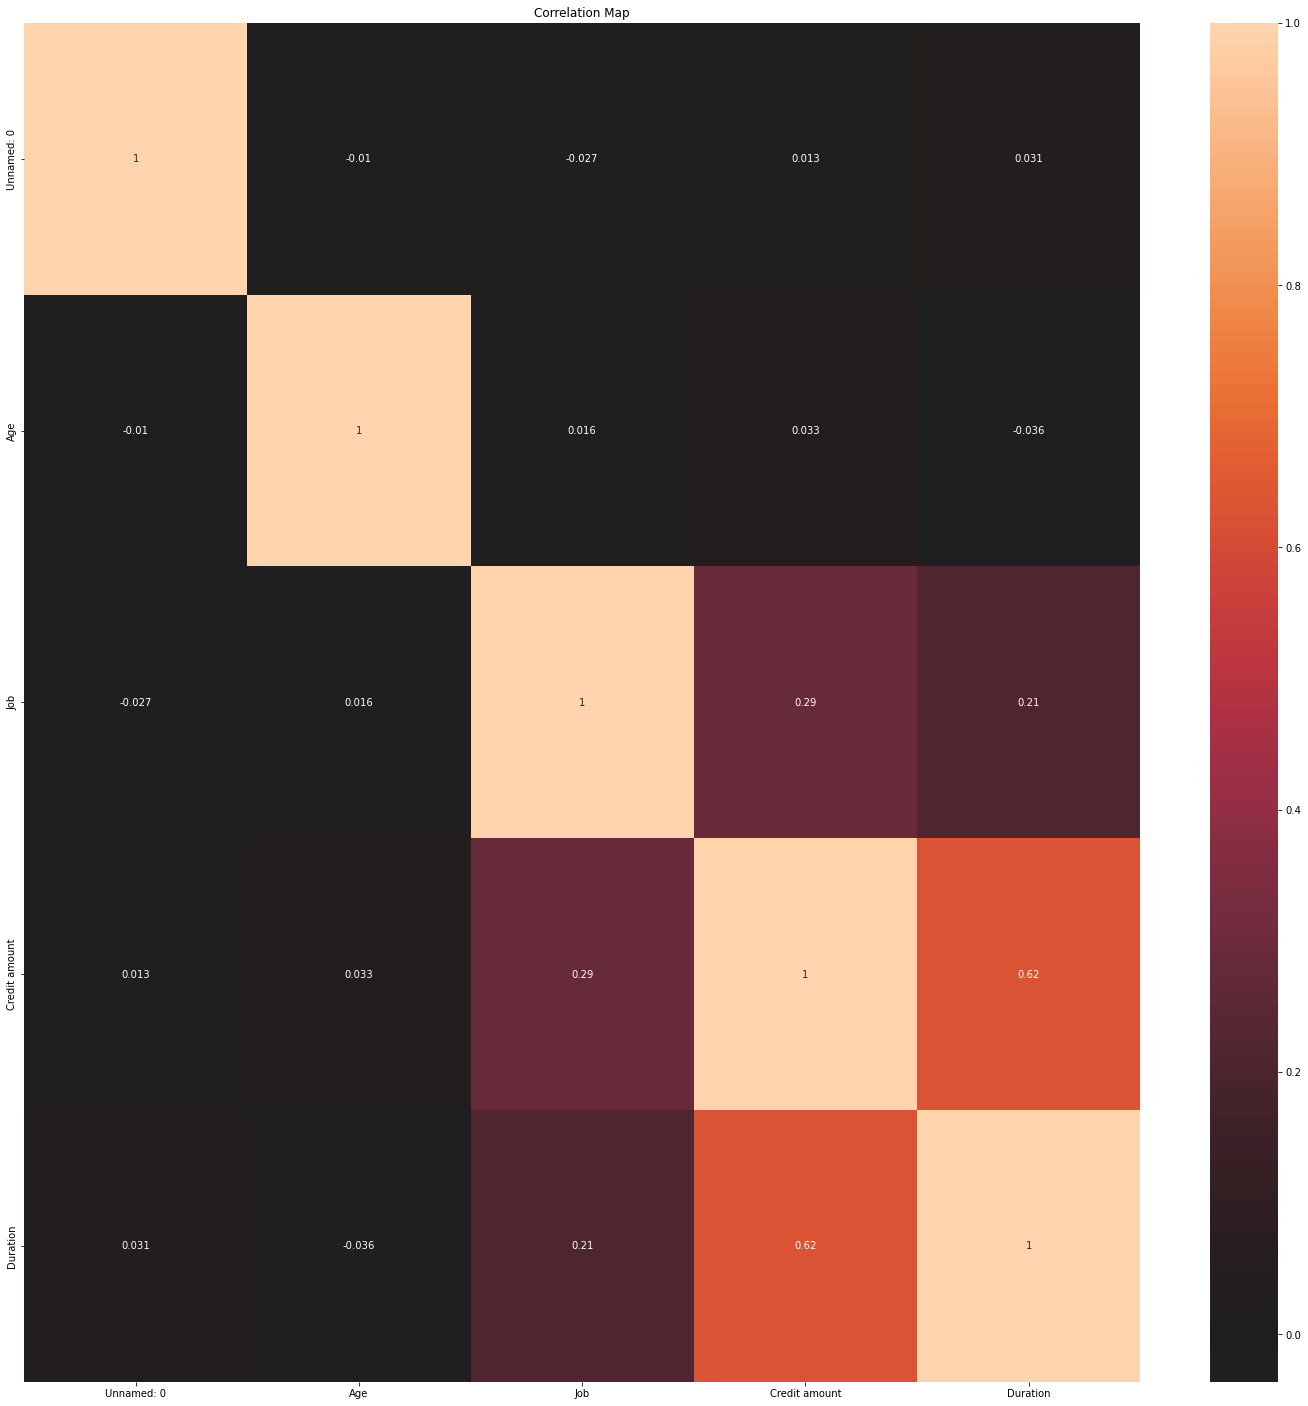

In [26]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), center=0, annot=True)
plt.title("Correlation Map")
plt.show()

In [27]:
num_atr=['Job','Credit amount','Duration']

cat_atr=['Unnamed: 0','Sex','Housing','Saving accounts','Checking account','Purpose','Risk']

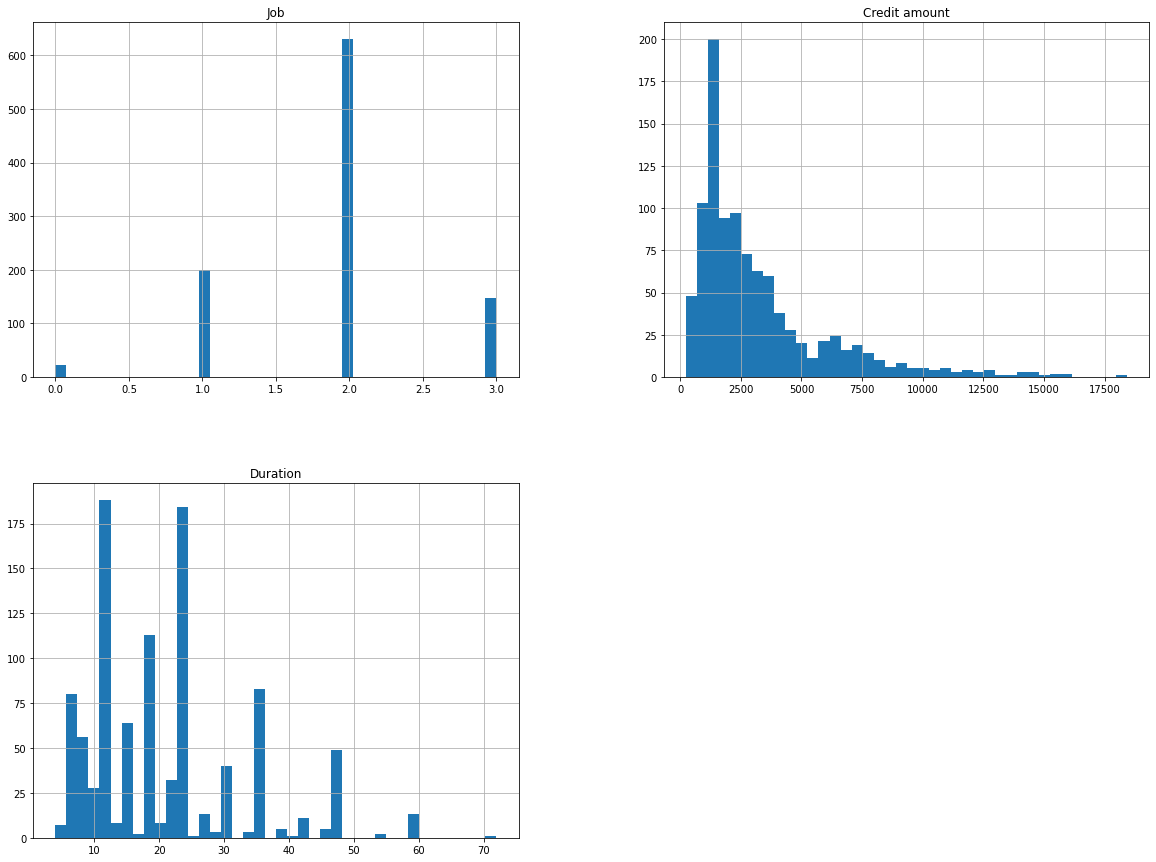

In [28]:
df[num_atr].hist(bins=40, figsize=(20,15)) 
plt.show()

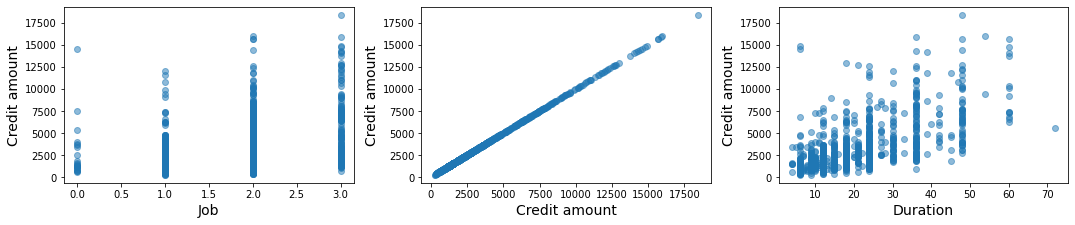

In [29]:
plt.figure(figsize=(20,12))
x=1
for i in num_atr:
    plt.subplot(4,4,x)
    plt.scatter(data=df,y='Credit amount',x=i,alpha=0.5)
    plt.ylabel('Credit amount',fontsize=14)
    plt.xlabel(i,fontsize=14)
    plt.tight_layout()
    x=x+1

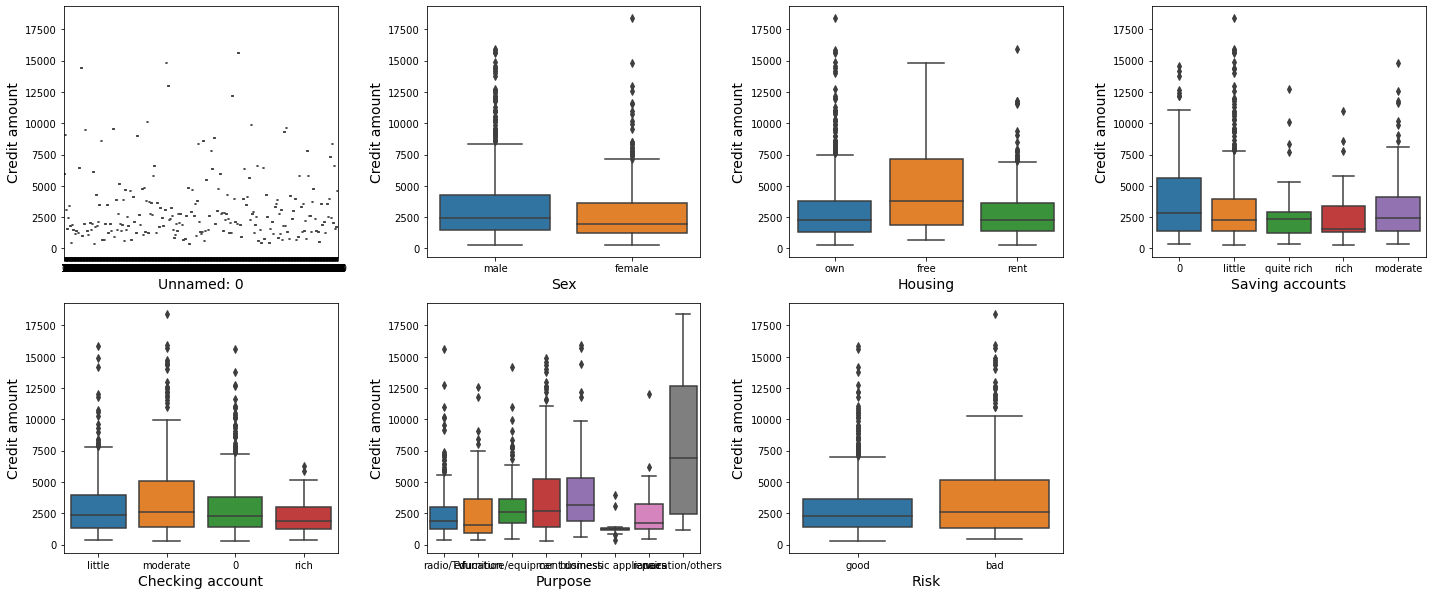

In [38]:
plt.figure(figsize=(20,12))
x=1
for i in cat_atr:
    plt.subplot(3,4,x)
    sns.boxplot(data=df,y='Credit amount',x=i)
    plt.ylabel('Credit amount',fontsize=14)
    plt.xlabel(i,fontsize=14)
    plt.tight_layout()
    x=x+1
plt.show()

In [39]:
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [40]:
df ["Saving accounts"].fillna("0", inplace = True)
df ["Checking account"].fillna("0", inplace = True)

In [41]:
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [42]:
df.shape

(1000, 11)

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 

In [44]:
from sklearn.model_selection import train_test_split
X= df.drop(['Credit amount'],axis=1)
y= df['Credit amount']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
ss = StandardScaler()
#ss.fit_transform(X_train[num_atr])
X_train[num_atr] = ss.fit_transform(X_train[num_atr])

KeyError: "['Credit amount'] not in index"

In [ ]:
X_train[num_atr].head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

In [ ]:
X_train[cat_atr].head()

In [ ]:
#a = pd.DataFrame(X_train[cat_atr])
#b = pd.DataFrame(X_train[num_atr])
a=X_train[cat_atr]
b=X_train[num_atr]
#b = ss.transform(price[num_atr])
print (a.head())
print (b.head())
# 7.1 Horizontally concatenate now
#Xtr = np.hstack([a,b]) # It is not X_train
#Xtr.shape # (11,15)

In [ ]:
Xtr = pd.concat([a,b], axis=1)

In [ ]:
Xtr.head()

In [ ]:
y_train.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()

In [ ]:
reg.fit(Xtr, y_train)

In [ ]:
ss = StandardScaler()
#ss.fit_transform(X_train[num_atr])
X_test[num_atr] = ss.fit_transform(X_test[num_atr])

le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)

In [ ]:
a=X_test[cat_atr]
b=X_test[num_atr]

In [ ]:
Xtr1 = pd.concat([a,b], axis=1)

In [ ]:
Xtr1.head()

In [ ]:
reg.predict(Xtr1)